# CDC – 2014 BRFSS Survey Data and Documentation

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

Source:
- https://www.cdc.gov/brfss/annual_data/annual_2014.html
- https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

- Diabetes_binary: 0 = no diabetes, 1 = prediabetes or diabetes
- HighBP: 0 = No High Blood Pressure, 1 = High Blood Pressure
- HighChol: 0 = No High Cholesterol, 1 = High Cholesterol
- CholCheck: 0 = No Cholesterol Check In 5 Years, 1 = Have Cholesterol Check In 5 Years
- BMI: Body Mass Index
- Smoker (Note: Have smoked atleast 100 cigarettes in their entire life): 0 = No, 1 = Yes
- Stroke: 0 = Never had stroke before, 1 = Had stroke before
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes	
- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes	
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes	
- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days	
- PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days	
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes	
- Sex: 0 = female 1 = male	
- Age: 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older	
- Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)	
- Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more	

In [1]:
# Reading and Manipulating Data
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tune Models, Metric Scores, Splitting
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
    )
from xgboost import XGBClassifier
import tensorflow as tf
from scikeras.wrappers import KerasClassifier

# Model Deployment
import pickle

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
data = pd.read_csv('../dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df = data.copy(deep=True)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [5]:
df.shape

(253680, 22)

The dataset has **253680** rows and **22** columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

- All of the variable is a float type
- No missing values

In [7]:
duplicates = df[df.duplicated()]
percentage = (len(duplicates) / len(df)) * 100
print("Percentage of Duplicated Data: {:.2f}%".format(percentage))

Percentage of Duplicated Data: 9.54%


The data has **no missing value** but contains **duplicates**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


- Diabetes_binary variable is showing that the most of the record is having prediabetes or no diabetes
- From the dependent variable we can see that most of the record is actually healthy which is why the data is more skewed to prediabetes or no diabetes

# EDA

## Univariate Analysis

In [9]:
def pie_plot(label1, label2, feature):
    labels = [label1, label2]
    plt.pie(df[feature].value_counts() , labels =labels ,autopct='%.02f' )
    plt.show()

### Observation on High Blood Pressure

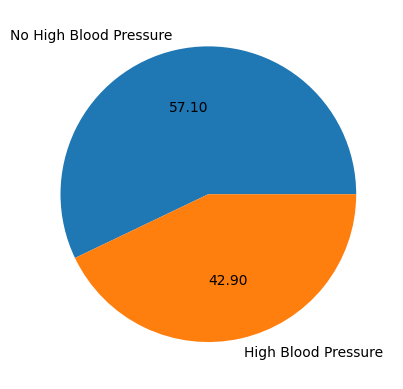

In [10]:
pie_plot("No High Blood Pressure", "High Blood Pressure", "HighBP")

### Observation on High Cholesterol

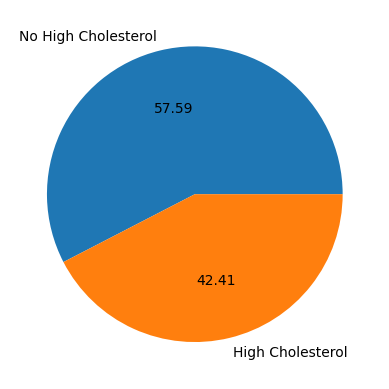

In [11]:
pie_plot("No High Cholesterol", "High Cholesterol", "HighChol")

### Observation on Cholesterol Check

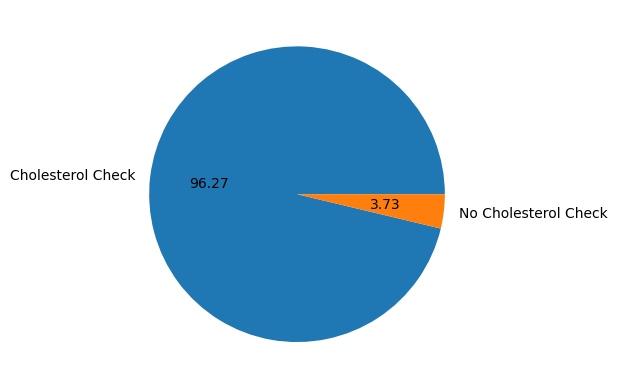

In [12]:
pie_plot("Cholesterol Check", "No Cholesterol Check", "CholCheck")

### Observation on Smoker

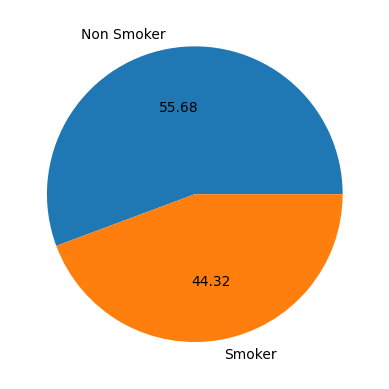

In [13]:
pie_plot("Non Smoker", "Smoker", "Smoker")

### Observation on Stroke

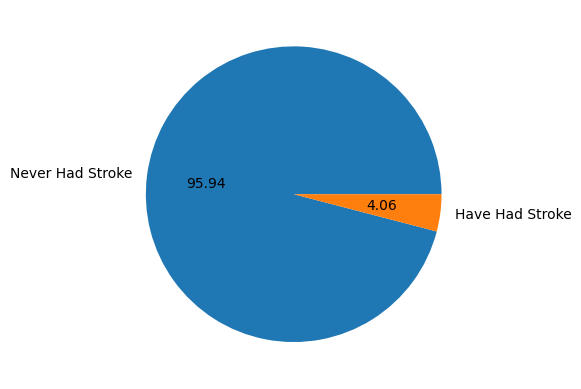

In [14]:
pie_plot("Never Had Stroke", "Have Had Stroke", "Stroke")

### Observation on Heart Disease or Attack

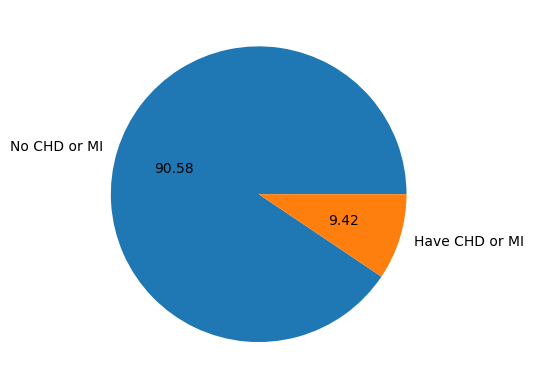

In [15]:
pie_plot("No CHD or MI", "Have CHD or MI", "HeartDiseaseorAttack")

### Observation on Physical Activity

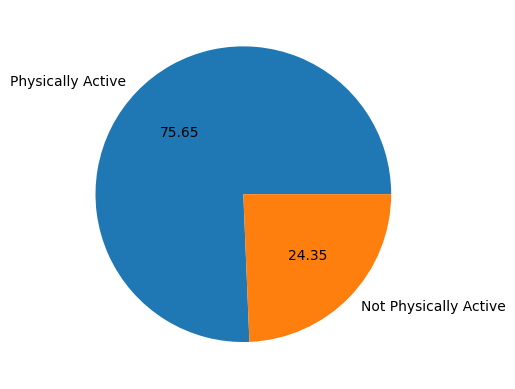

In [16]:
pie_plot("Physically Active", "Not Physically Active", "PhysActivity")

### Observation on Fruits Consumption

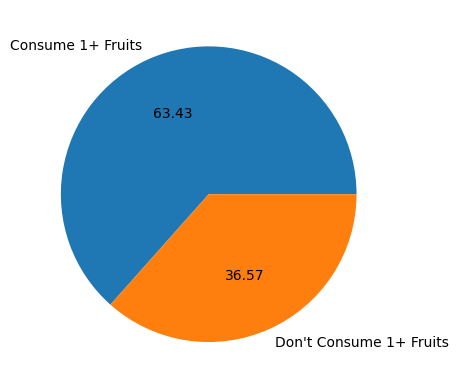

In [17]:
pie_plot("Consume 1+ Fruits", "Don't Consume 1+ Fruits", "Fruits")

### Observation on Vegetables Consumption

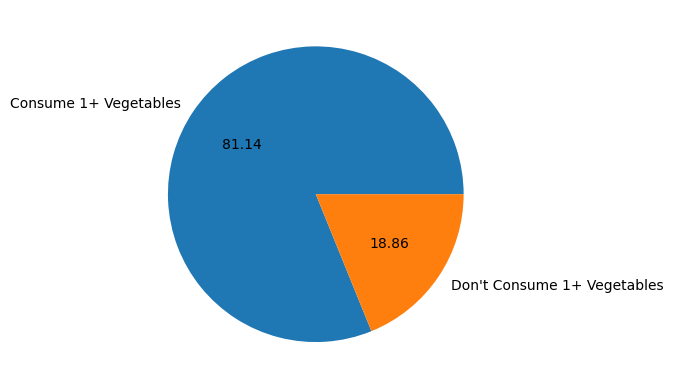

In [18]:
pie_plot("Consume 1+ Vegetables", "Don't Consume 1+ Vegetables", "Veggies")

### Observation on Heavy Drinking

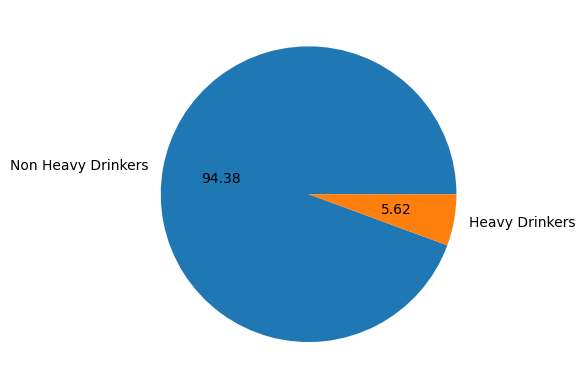

In [19]:
pie_plot("Non Heavy Drinkers", "Heavy Drinkers", "HvyAlcoholConsump")

### Observation on Health Care Coverage

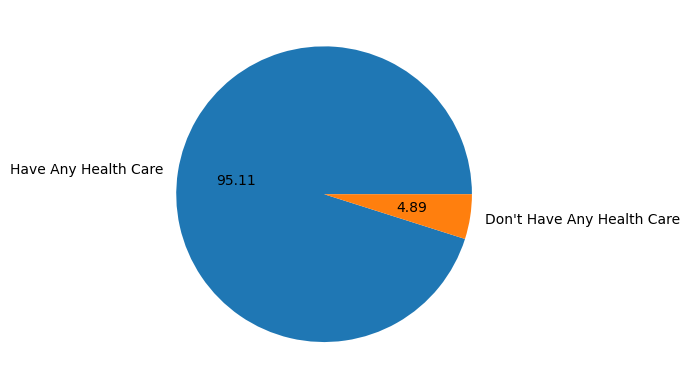

In [20]:
pie_plot("Have Any Health Care", "Don't Have Any Health Care", "AnyHealthcare")

### Observation on Not Seeing Doctor Because of Cost

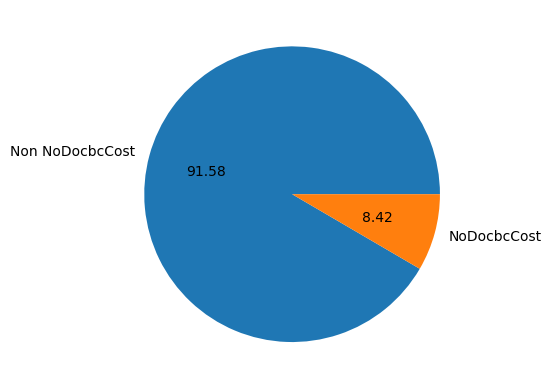

In [21]:
pie_plot("Non NoDocbcCost", "NoDocbcCost", "NoDocbcCost")

### Observation on Difficulty Walking

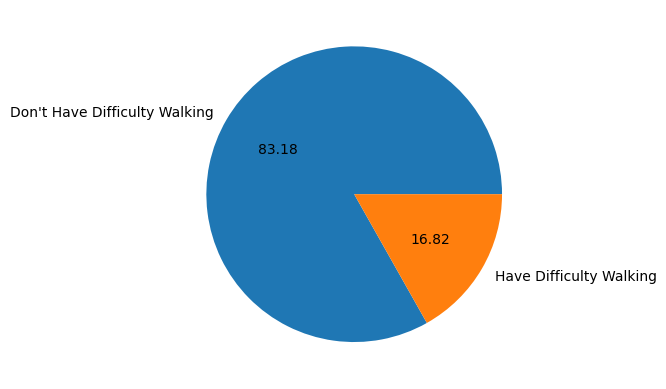

In [22]:
pie_plot("Don't Have Difficulty Walking", "Have Difficulty Walking", "DiffWalk")

### Observation on Sex

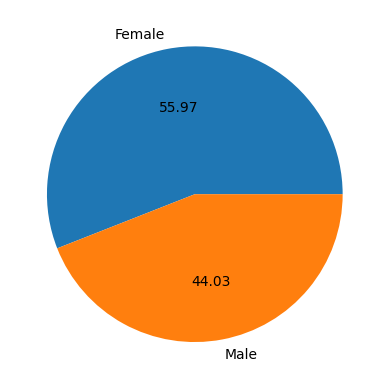

In [23]:
pie_plot("Female", "Male", "Sex")

From the categorical data above, we know that most of the respondent is healhty. We can conclude this from the fact below:
- There are less respondent with **High Blood Pressure**
- There are less respondent with **High Cholesterol**
- There are heavily more respondent with **Cholesterol Level** checked in the last 5 years
- There are slightly more **Non Smoker** respondent
- Most of the respondent never had **Stroke** before
- Most of the respondent don't have **Coronary Heart Disease (CHD) or Myocardial Infarction (MI)**
- There are more **Physically** active respontdent
- There are more respondent who consume 1 or more **Fruits** per day
- There are heavily more respondent who consume 1 or more **Vegetables** per day
- Most of the respondent is not a **Heavy Drinker** (More than 14 drinks per week for men and more than 7 drinks per week for women)
- Most of the respondent have a **Health Care** coverage 
- Most of the respondent never had a problem with the **Cost of seeing a Doctor** in the last 12 months
- There are less respondent who have difficulty **Walking**


### Observation On Body Mass Index

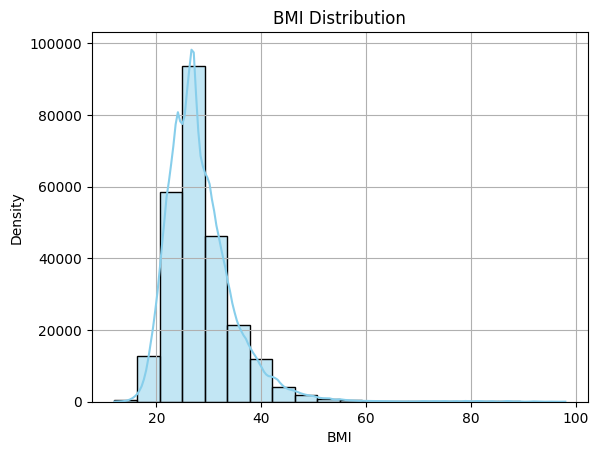

In [24]:
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.show()

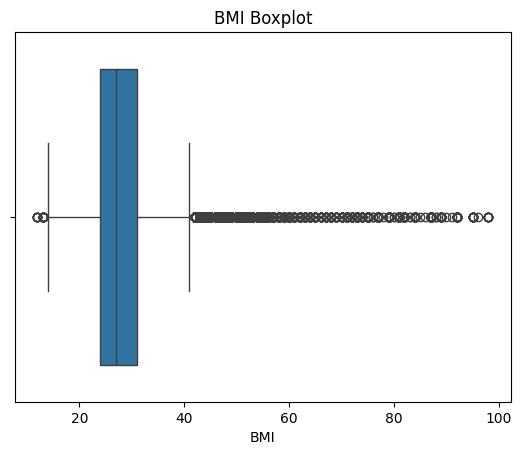

In [25]:
sns.boxplot(x=df['BMI'])
plt.title('BMI Boxplot')
plt.xlabel('BMI')
plt.show()

- Most of the data distribution for BMI is around 20 to 40
- We can later group this BMI

In [26]:
more_than_40 = df[df['BMI'] > 40]
more_than_40_percentage = len(more_than_40)/len(df) * 100
print("Percentage of More Than 40 BMI Data: {:.2f}%".format(more_than_40_percentage))

Percentage of More Than 40 BMI Data: 4.52%


### Observation on General Health

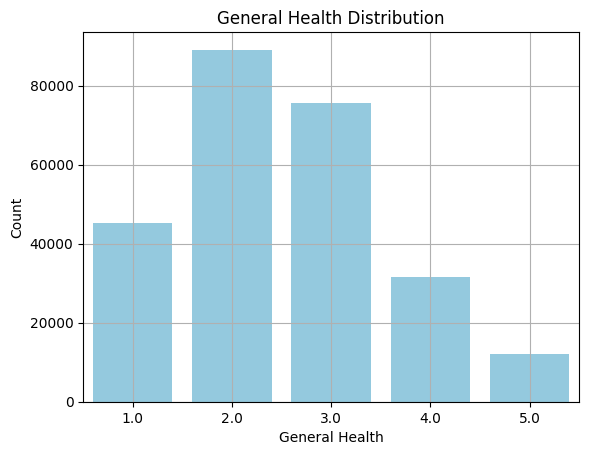

In [27]:
sns.countplot(x=df['GenHlth'], color='skyblue')
plt.title('General Health Distribution')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- Most respondent have an excellent health
- Only a small percentage of respondent have a poor health condition

### Observation on Mental Health

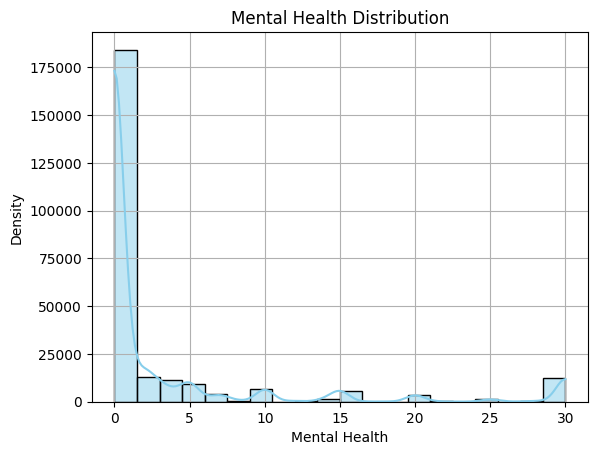

In [28]:
sns.histplot(df['MentHlth'], bins=20, kde=True, color='skyblue')
plt.title('Mental Health Distribution')
plt.xlabel('Mental Health')
plt.ylabel('Density')
plt.grid(True)
plt.show()

- Most of the respondent don't have any mental health issue in the last 30 days

### Observation on Physical Health

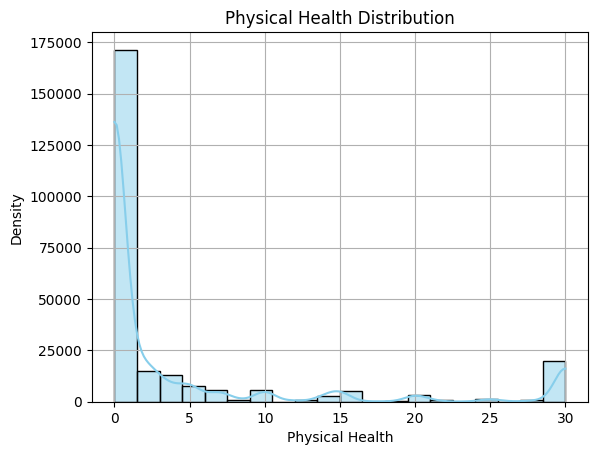

In [29]:
sns.histplot(df['PhysHlth'], bins=20, kde=True, color='skyblue')
plt.title('Physical Health Distribution')
plt.xlabel('Physical Health')
plt.ylabel('Density')
plt.grid(True)
plt.show()

- Most of the respondent don't have any physical health issue in the last 30 days

### Observation on Age

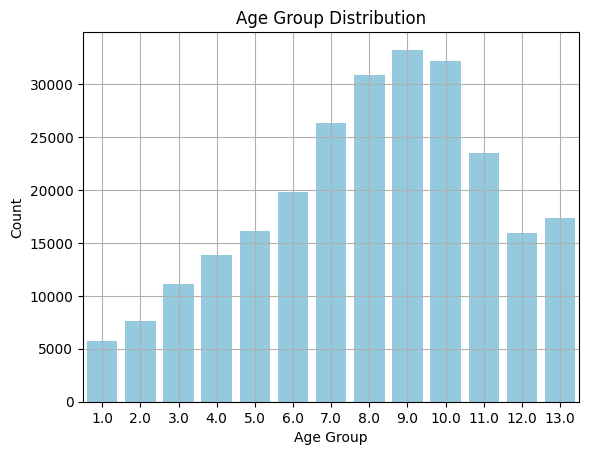

In [30]:
sns.countplot(x=df['Age'], color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- The highest age group is from group 9 which is from 60-64

### Observation on Education

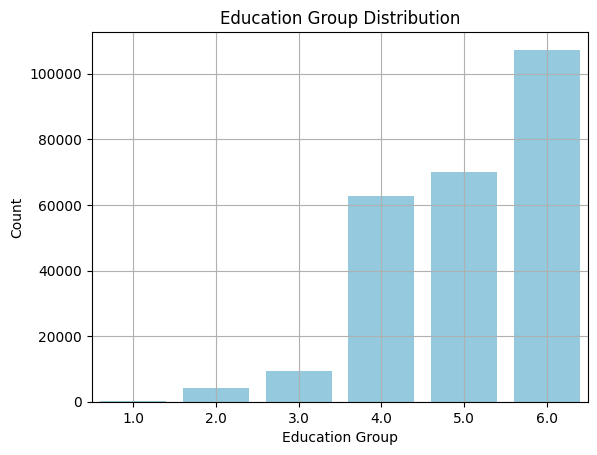

In [31]:
sns.countplot(x=df['Education'], color='skyblue')
plt.title('Education Group Distribution')
plt.xlabel('Education Group')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- Most of the respondents have at least a high school graduate, with college graduates being the highest

### Observation on Income

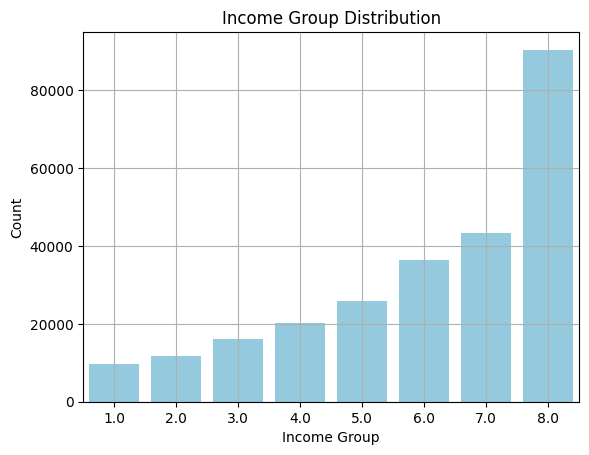

In [32]:
sns.countplot(x=df['Income'], color='skyblue')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- Income group 8 is the highest, which is making $75,000 or more

## Correlation Check

<Axes: title={'center': 'Correlation with Diabetes'}>

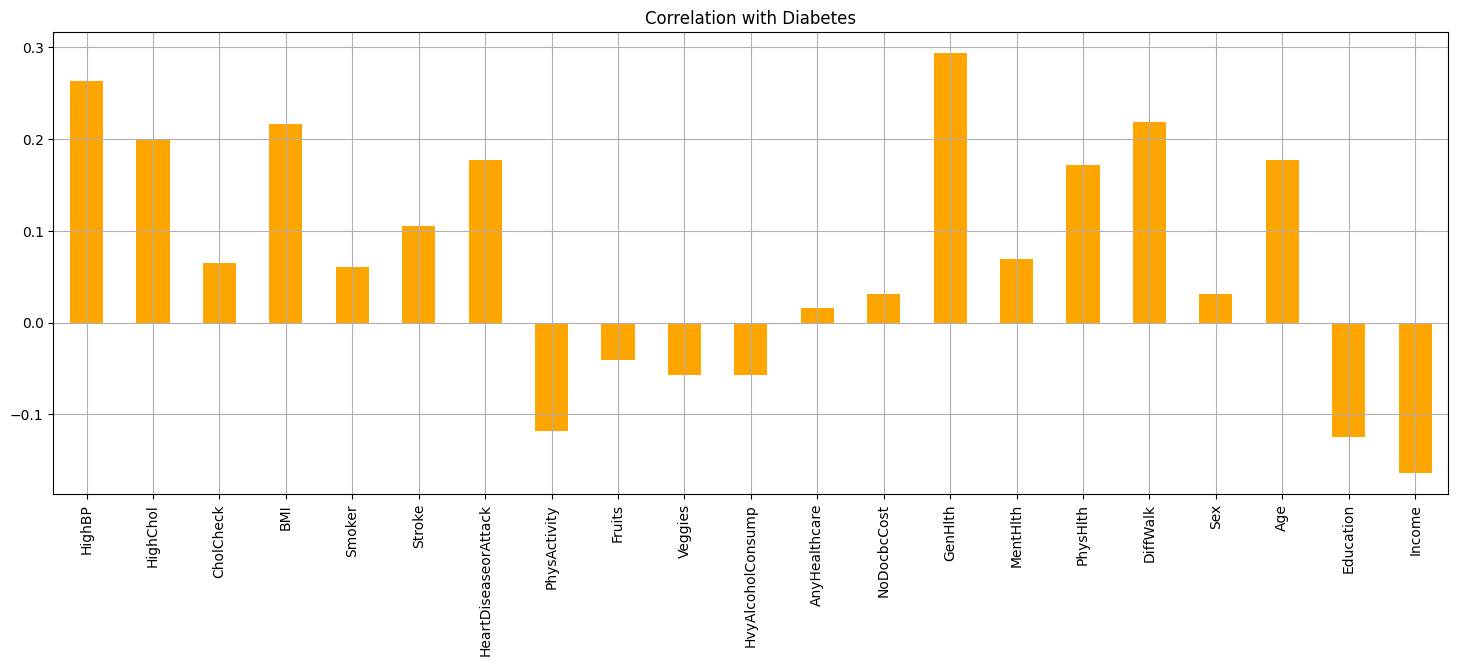

In [33]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(18, 6) ,title="Correlation with Diabetes",color="Orange")

- AnyHealthcare, Sex, and No DocbcCost have very little correlation with Diabetes_binary. These variable will be dropped.
- CholCheck, Smoker, Fruits, Veggies, HvyAlchoholConsump, and MentHlth have some correlation with Diabetes_binary. Should check these variables to decide dropping them or not.
- HighBP, HichChol, BMI, Stroke, HearhDiseaseorAttack, PhysActivity, GentHlth, PhysHlth, DiffWalk, Age, Education, and Income have significant correlation with Diabetes_binary

## Bivariate Analysis

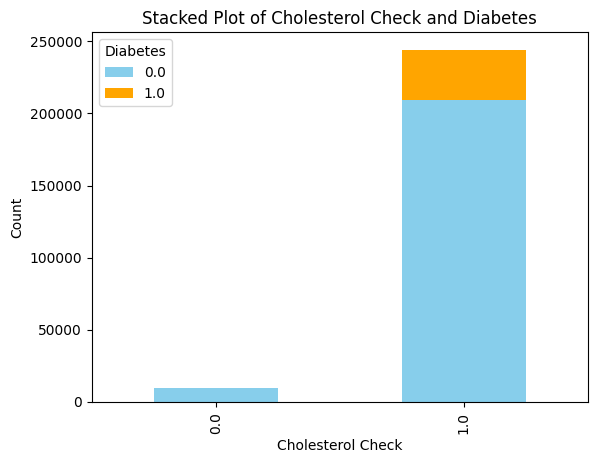

In [34]:
stacked_data = df.groupby(['CholCheck', 'Diabetes_binary']).size().unstack()

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Add labels and title
plt.title('Stacked Plot of Cholesterol Check and Diabetes')
plt.xlabel('Cholesterol Check')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes', loc='upper left')

# Show plot
plt.show()

- All the respondents who have diabetes have checked their cholesterol level in the last 5 years. This could happened because of the data on checked cholesterol level is highly skewed

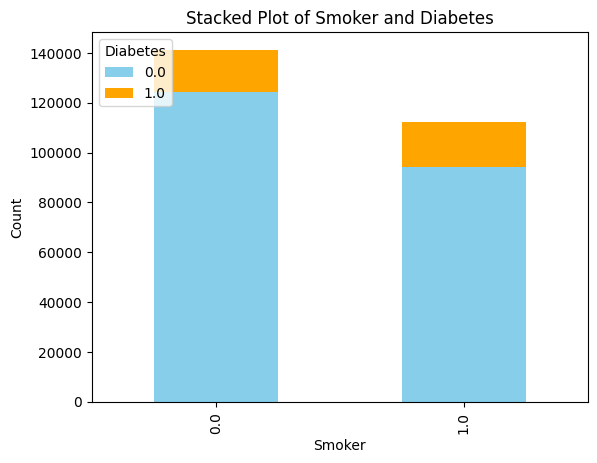

In [35]:
stacked_data = df.groupby(['Smoker', 'Diabetes_binary']).size().unstack()

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Add labels and title
plt.title('Stacked Plot of Smoker and Diabetes')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes', loc='upper left')

# Show plot
plt.show()

- Smoker and non smoker respondents doesn't have a significant diffenrence in diabetes risk

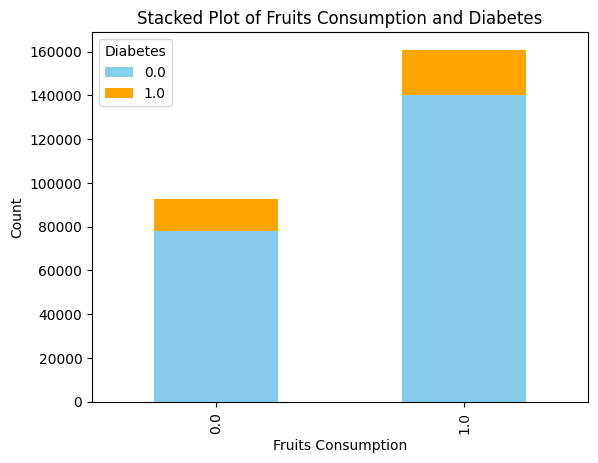

In [36]:
stacked_data = df.groupby(['Fruits', 'Diabetes_binary']).size().unstack()

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Add labels and title
plt.title('Stacked Plot of Fruits Consumption and Diabetes')
plt.xlabel('Fruits Consumption')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes', loc='upper left')

# Show plot
plt.show()

- There are more respondents who consume 1 or more fruits per day having diabetes

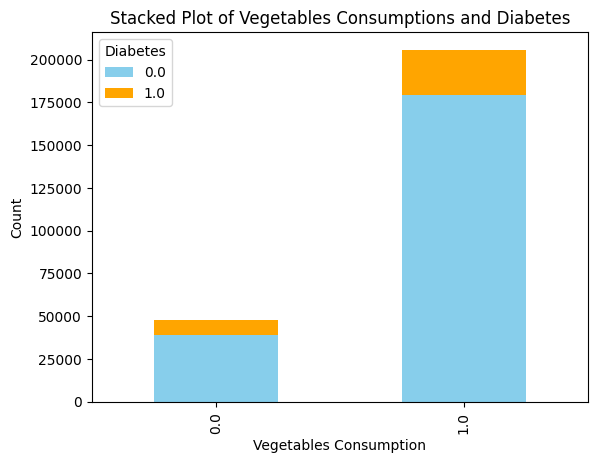

In [37]:
stacked_data = df.groupby(['Veggies', 'Diabetes_binary']).size().unstack()

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Add labels and title
plt.title('Stacked Plot of Vegetables Consumptions and Diabetes')
plt.xlabel('Vegetables Consumption')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes', loc='upper left')

# Show plot
plt.show()

- There are even more respondents who consume 1 or more vegetables having diabetes

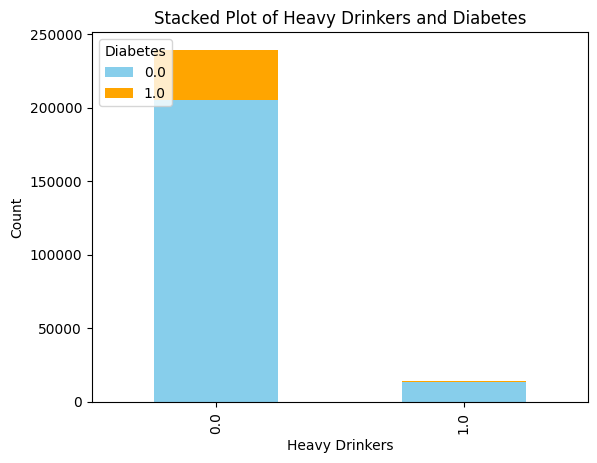

In [38]:
stacked_data = df.groupby(['HvyAlcoholConsump', 'Diabetes_binary']).size().unstack()

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Add labels and title
plt.title('Stacked Plot of Heavy Drinkers and Diabetes')
plt.xlabel('Heavy Drinkers')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes', loc='upper left')

# Show plot
plt.show()

- Most of the respondents who have diabetes is not a heavy drinkers

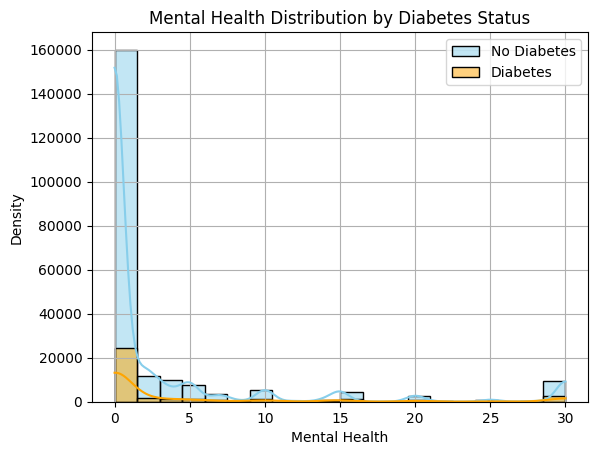

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create two separate DataFrames for individuals with and without diabetes
df_diabetes_0 = df[df['Diabetes_binary'] == 0]
df_diabetes_1 = df[df['Diabetes_binary'] == 1]

# Plot histograms for each group
sns.histplot(df_diabetes_0['MentHlth'], bins=20, kde=True, color='skyblue', label='No Diabetes')
sns.histplot(df_diabetes_1['MentHlth'], bins=20, kde=True, color='orange', label='Diabetes')

# Add labels and title
plt.title('Mental Health Distribution by Diabetes Status')
plt.xlabel('Mental Health')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


- Most of the respondents who have diabetes doesn't have mental health issue in the last 30 days

## Feature Engineering

In [137]:
df1 = df.copy(deep=True)
bins = [0, 18.5, 25, 30, 35, float('inf')]
labels = [0, 1, 2, 3, 4]
df1['BMI_group'] = pd.cut(df1['BMI'], bins=bins, labels=labels, include_lowest=True)
df1 = df1.astype(int)

Grouping the BMI to 5 categories:
- 0: Underweight
- 1: Normal
- 2: Overweight
- 3: Obese
- 4: Extremely Obese

In [138]:
df1['BMI_group'].value_counts().sort_index()

BMI_group
0     3127
1    86099
2    91176
3    44453
4    28825
Name: count, dtype: int64

## Handling Duplicated Data

In [139]:
df1 = df1.drop_duplicates()

In [140]:
df1.shape

(229474, 23)

## Drop Unused Feature

In [141]:
df1 = df1.drop(['Sex', 'NoDocbcCost', 'BMI', 'Education', 'Income'], axis=1)

- Even if Education and Income features have significant correlation to the target variable, but it's not health related

In [142]:
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,BMI_group
0,0,1,1,1,1,0,0,0,0,1,0,1,5,18,15,1,9,4
1,0,0,0,0,1,0,0,1,0,0,0,0,3,0,0,0,7,1
2,0,1,1,1,0,0,0,0,1,0,0,1,5,30,30,1,9,2
3,0,1,0,1,0,0,0,1,1,1,0,1,2,0,0,0,11,2
4,0,1,1,1,0,0,0,1,1,1,0,1,2,3,0,0,11,1


## Data Preprocessing

### Split Data

In [143]:
X = df1[df1.columns[1:]]
y = df1[df1.columns[:1]]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)
print("Training Data:", X_train.shape)
print("Test Data:", X_test.shape)

Training Data: (172105, 17)
Test Data: (57369, 17)


## Building Model

### Building Neural Network Model

In [153]:
# Define a function to create your neural network model using Keras
def create_neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['recall'])
    return model

# Custom estimator class that wraps the Keras model
class KerasEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = create_neural_network()
        self.model.fit(X, y, epochs=100, batch_size=128, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

### Building Pipeline

In [154]:
models = []

models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=42, C=1, solver='liblinear'))
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=160, class_weight='balanced'))
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=42))
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=42, algorithm='SAMME'))
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=42, eval_metric='logloss'))
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", DecisionTreeClassifier(random_state=42))
            ]
        ),
    )
)
models.append(
    (
        "NN",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("neural_network", KerasEstimator())
            ]
        ),
    )
)

# Perform cross-validation
results = []
names = []

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 15.856849874580373
RF: 30.764008318972856
GBM: 15.507324564062156
ADB: 15.427558257345492
XGB: 16.210163031085017
DTREE: 26.740909602611733
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step
NN: 16.32419819476557


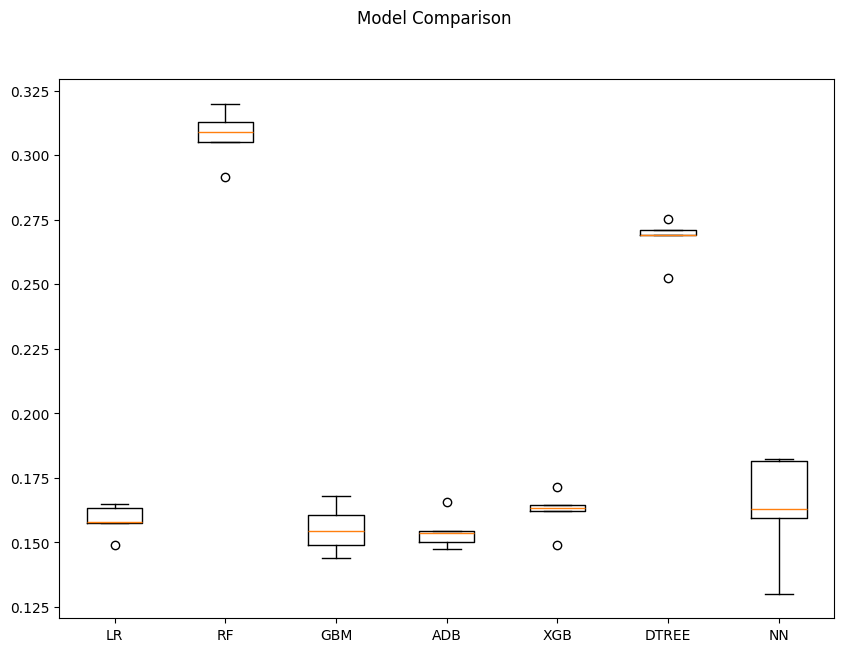

In [155]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- Recall is used to evaluate the model because the focus it to minimizing the false negatives
- From the plot above, the best model is **Decision Tree**
- The most consistent model is **Random Forest**

### Oversampling the data
To handle the skewness in the target variable

In [156]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)
X_train_oversampling, y_train_oversampling = sm.fit_resample(X_train, y_train)

### Neural Network Model on oversampled data

In [157]:
# Define a function to create your neural network model using Keras
def create_neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_oversampling.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['recall'])
    return model

# Custom estimator class that wraps the Keras model
class KerasEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = create_neural_network()
        self.model.fit(X, y, epochs=100, batch_size=128, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

## Pipeline on Oversampled Data

In [158]:
models = []

models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=42, C=1, solver='liblinear'))
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=160))
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=42))
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=42, algorithm='SAMME'))
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=42, eval_metric='logloss'))
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", DecisionTreeClassifier(random_state=42, criterion='entropy'))
            ]
        ),
    )
)
models.append(
    (
        "NN",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("neural_network", KerasEstimator())
            ]
        ),
    )
)

results = []
names = []

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_oversampling, y=y_train_oversampling, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 74.73556122167116
RF: 86.8584578369379
GBM: 78.10085963241669
ADB: 74.2094285607959
XGB: 79.71079801375058
DTREE: 84.3711807766125
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step
NN: 81.54298211724583


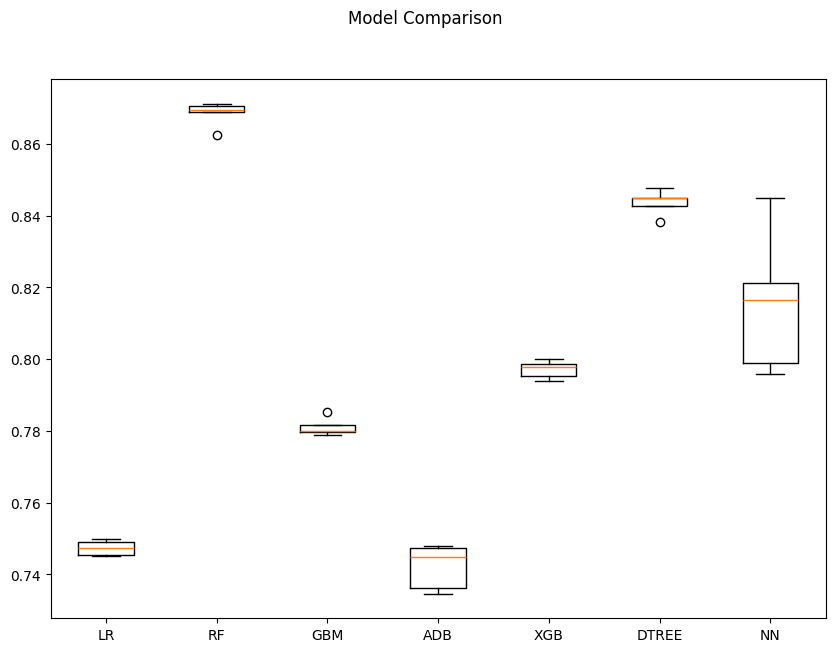

In [159]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- The **Random Forest** model has the best recall score and the most consistent one

## Deploy Model

In [160]:
random_forest_model = models[1][1]
random_forest_model.fit(X_train_oversampling, y_train_oversampling)
pickle.dump(random_forest_model, open("model/rf_model.pkl", "wb"))